## This notebook demostrates the implemetation of the three types of hierarchical clustering algorithms:
### Single linkage, Complete linkage, Average linkage

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch


import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [5]:
crime = pd.read_csv('inputs/US_violent_crime.csv')
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [7]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [11]:
#Rename first column to state.
crime = crime.rename(columns = {'Unnamed: 0':'State'})
crime.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


## EDA.

<AxesSubplot:xlabel='State'>

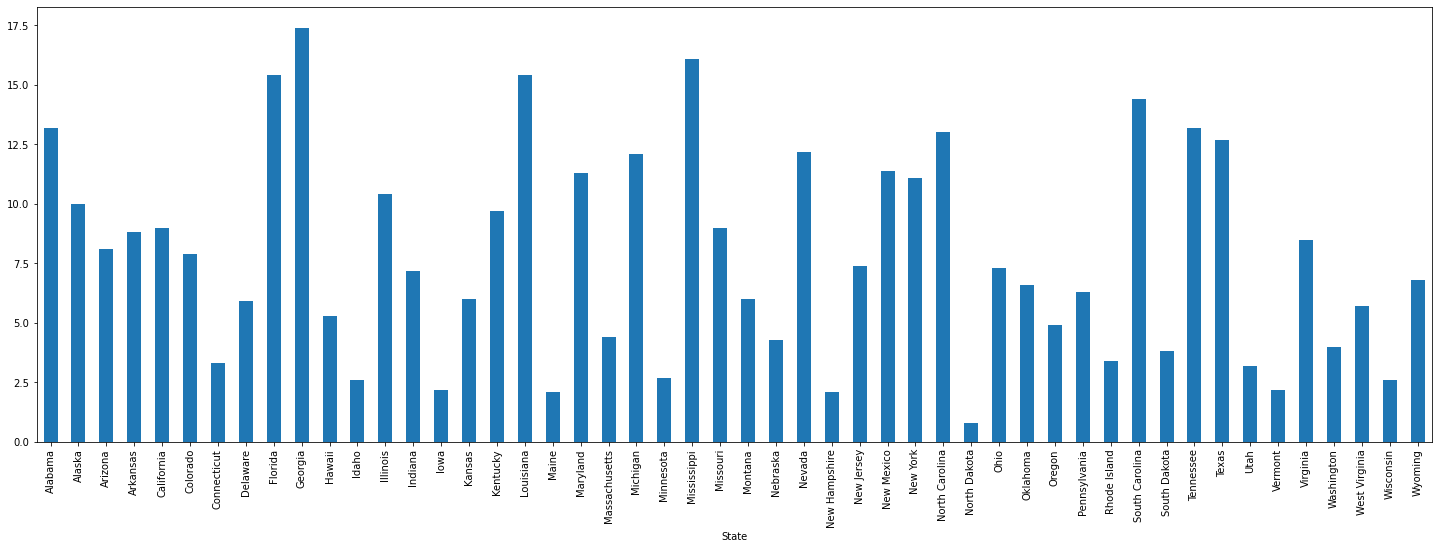

In [13]:
#Murder rate.
plt.figure(figsize = (25, 8))
crime.groupby('State')['Murder'].max().plot(kind = 'bar')

<AxesSubplot:xlabel='State'>

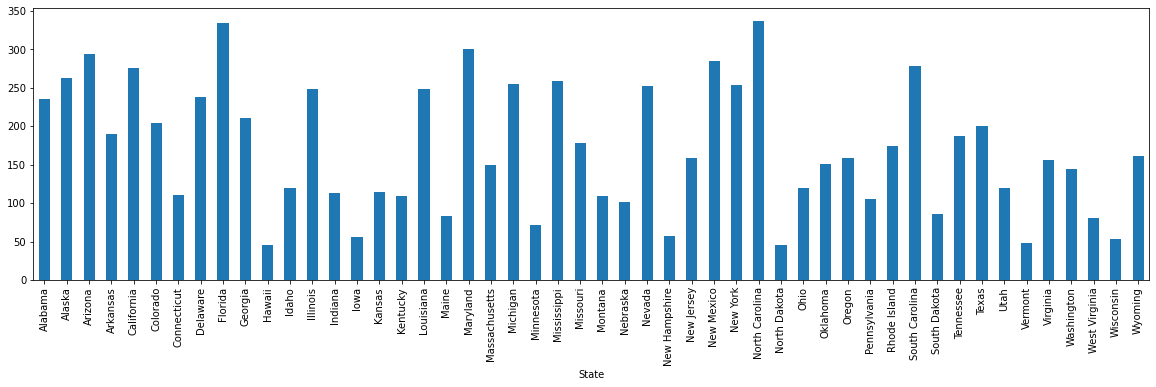

In [17]:
#Assault rate.
plt.figure(figsize = (20, 5))
crime.groupby('State')['Assault'].max().plot(kind = 'bar')

<AxesSubplot:xlabel='State'>

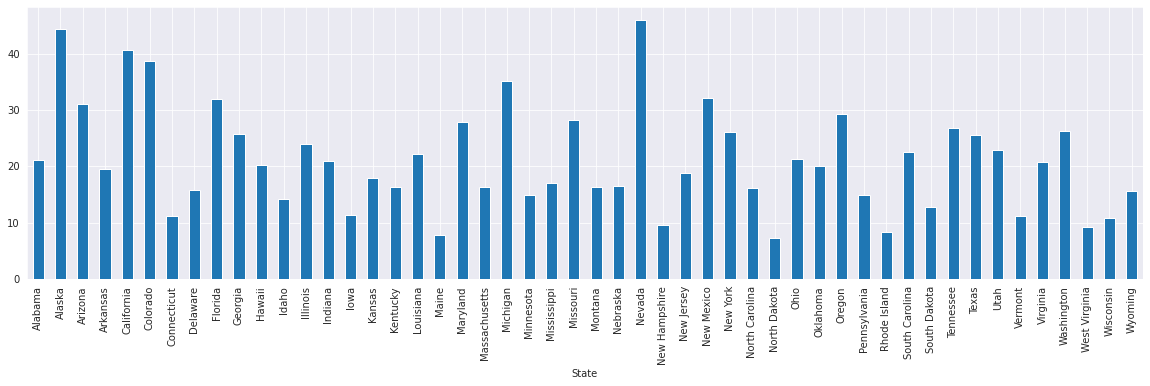

In [23]:
#Rape rate.
plt.figure(figsize = (20, 5))
crime.groupby('State')['Rape'].max().plot(kind = 'bar')

<AxesSubplot:xlabel='State'>

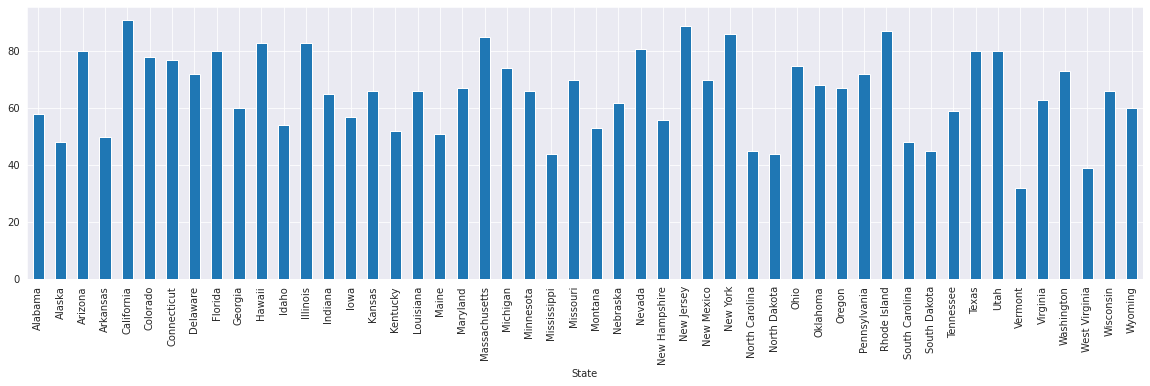

In [24]:
plt.figure(figsize = (20, 5))
crime.groupby('State')['UrbanPop'].max().plot(kind = 'bar')

In [25]:
#Scale numerical values only.
scaler = StandardScaler()

data = crime.iloc[:, 1:].values
scaled_data = scaler.fit_transform(data)

# Types of linkages.

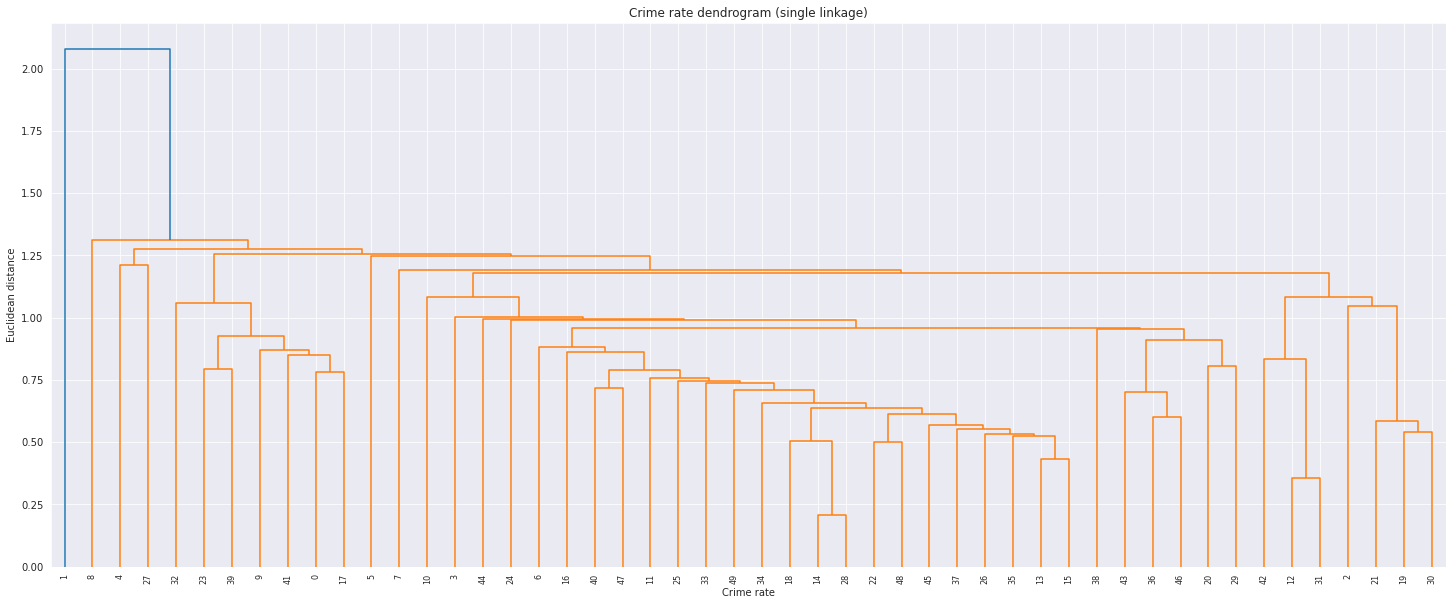

In [26]:
#1. Single linkage.
# The distance between 2 clusters is defined as the shortest distance between points in two clusters.

plt.figure(figsize = (25, 10))
plt.title('Crime rate dendrogram (single linkage)')
dend = sch.dendrogram(sch.linkage(scaled_data, method = 'single'))
plt.xlabel('Crime rate')
plt.ylabel('Euclidean distance')
plt.show()

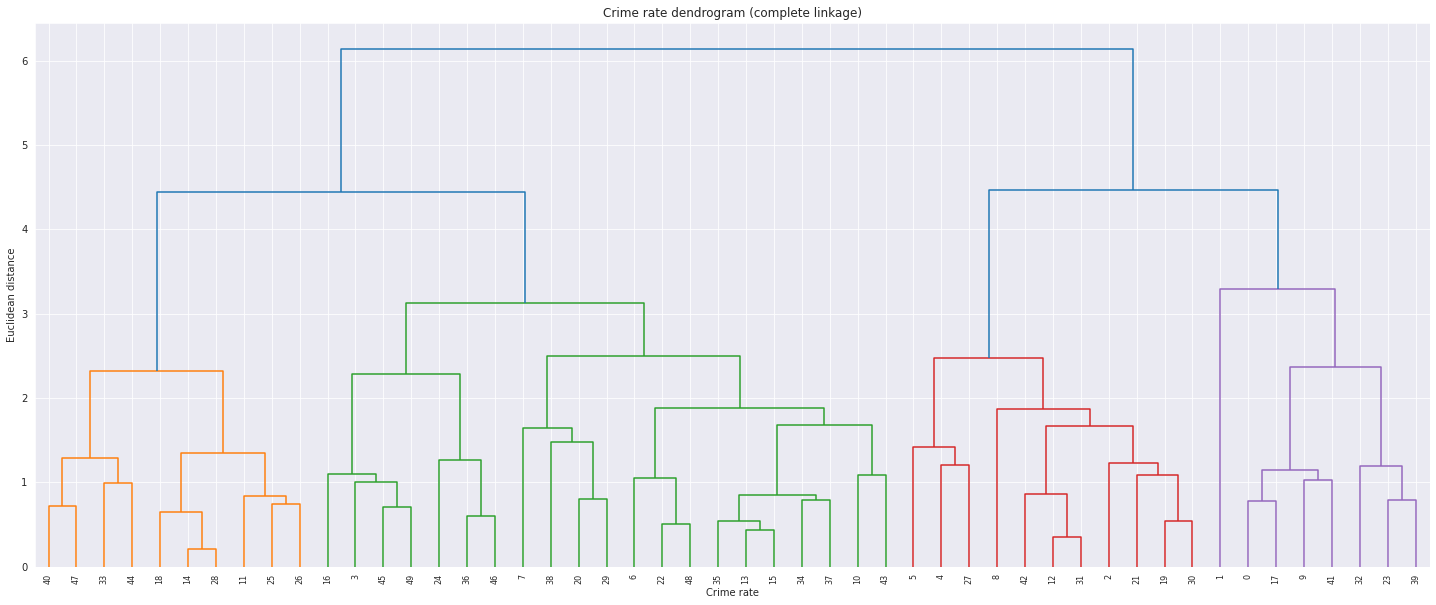

In [27]:
#2. Complete linkage.
#The distance between 2 clusters is defined as the maximum distance between any 2 points in clusters.

plt.figure(figsize = (25, 10))
plt.title('Crime rate dendrogram (complete linkage)')
dend = sch.dendrogram(sch.linkage(scaled_data, method = 'complete'))
plt.xlabel('Crime rate')
plt.ylabel('Euclidean distance')
plt.show()

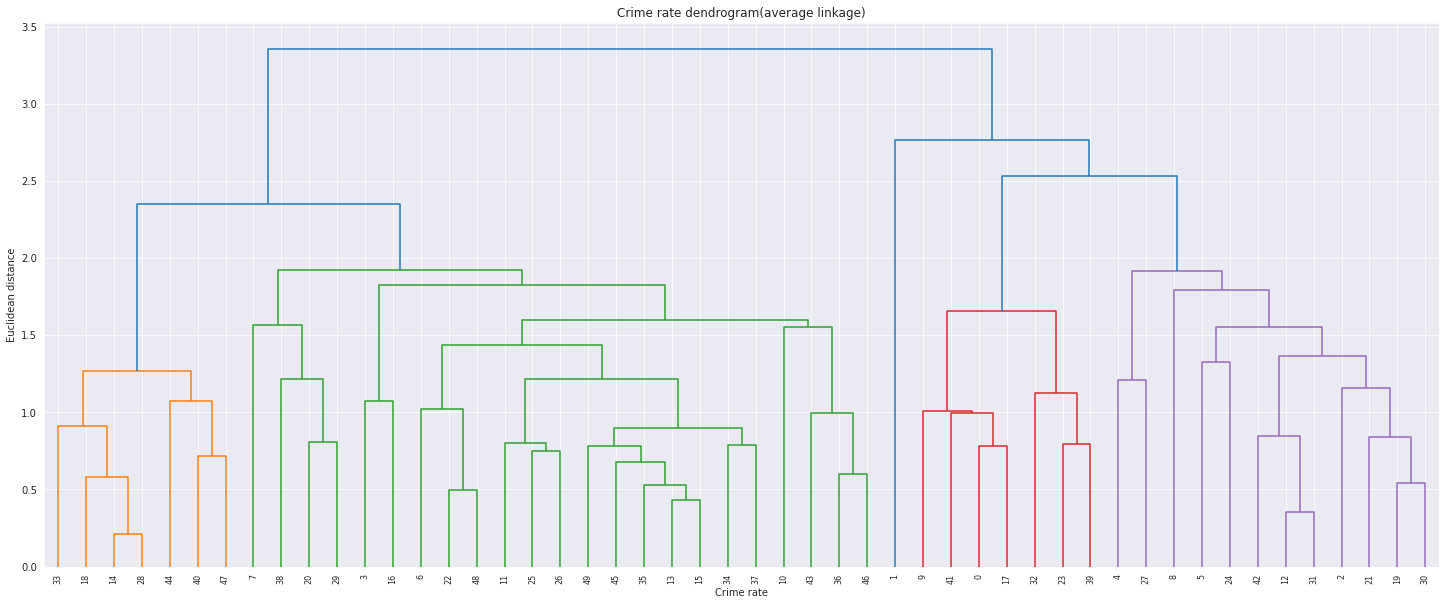

In [28]:
#3. Average linkage.
#THe distance between 2 points is defined as the average distance between every point of one cluster to every other point of the other cluster.

plt.figure(figsize = (25, 10))
plt.title('Crime rate dendrogram(average linkage)')
dend = sch.dendrogram(sch.linkage(scaled_data, method = 'average'))
plt.xlabel('Crime rate')
plt.ylabel('Euclidean distance')
plt.show()

### The single linkage type will produce dendrograms which are not structured properly, whereas complete or average linkage will produce clusters which have proper tree-like structure.

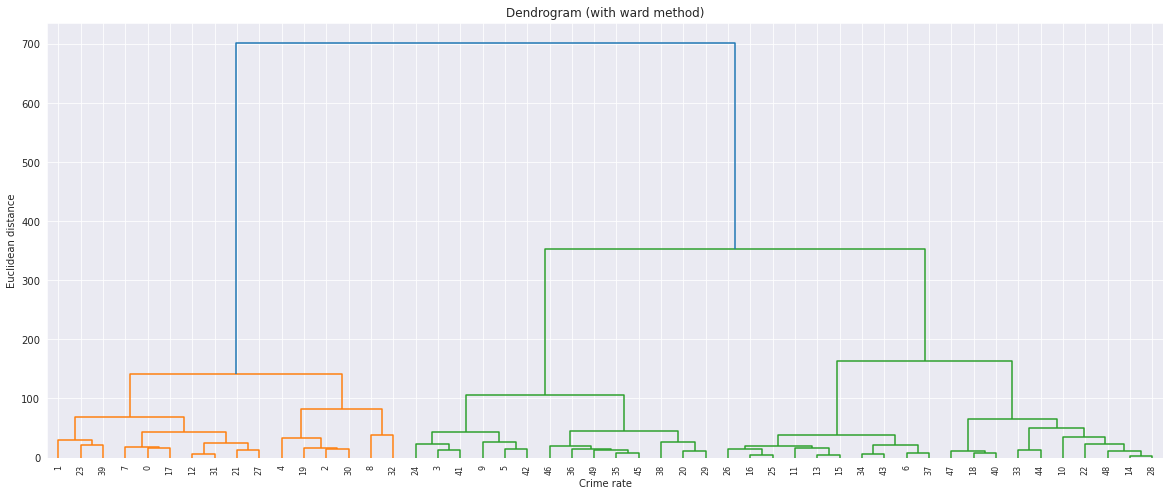

In [42]:
#With ward method.

plt.figure(figsize = (20, 8))
dendrogram = sch.dendrogram(sch.linkage(data, method = 'ward'))
plt.title('Dendrogram (with ward method)')
plt.xlabel('Crime rate')
plt.ylabel('Euclidean distance')
plt.show()

### To determine the optimal number of clusters, we look for the largest distance that we can vertically move without crossing any horizontal line.

In [43]:
#Fit the agglomerative clustering algo.
AC = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')

#Fit and predict to have the cluster labels.
y_pred = AC.fit_predict(data)
y_pred

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2])

In [46]:
#Fetch the cluster labels.
crime['cluster labels'] = y_pred
crime[['State', 'cluster labels']].head()

,State,cluster labels
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,2
4,California,1


<AxesSubplot:xlabel='cluster labels', ylabel='Murder'>

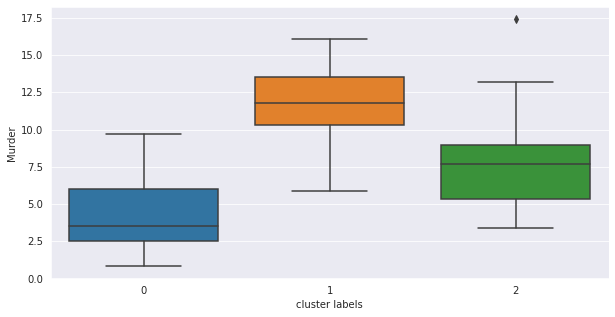

In [47]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'cluster labels', y = 'Murder', data = crime)

<AxesSubplot:xlabel='cluster labels', ylabel='Rape'>

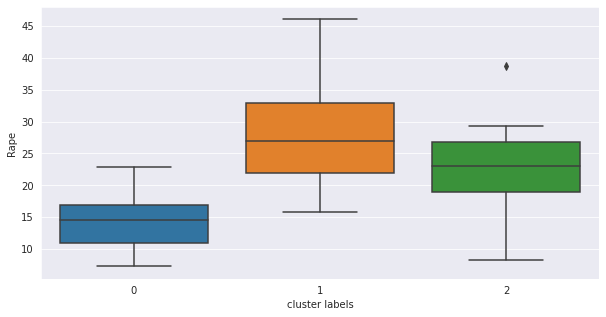

In [48]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'cluster labels', y = 'Rape', data = crime)

#### Observations:
- The Cities in the Cluster-0 seems to be Safe-Zone where there are relativley less Murders,Assaults and Rapes.

- The Cities in Cluster-1 seems to have higher crime rates and can be regarded as Danger-Zone.
- The Cities in Cluster-3 seems to have moderate crime rates when compared to other zones and can be called as Moderate-Zone

In [50]:
safe_zones = crime.groupby('cluster labels')['State'].unique()[1]
safe_zones

array(['Alabama', 'Alaska', 'Arizona', 'California', 'Delaware',
       'Florida', 'Illinois', 'Louisiana', 'Maryland', 'Michigan',
       'Mississippi', 'Nevada', 'New Mexico', 'New York',
       'North Carolina', 'South Carolina'], dtype=object)

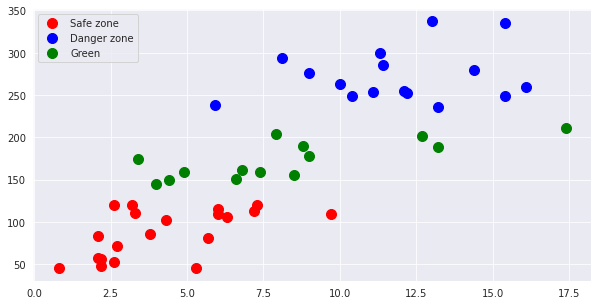

In [51]:
#Scatter plot based on the danger level clusters.
plt.figure(figsize = (10, 5))
plt.scatter(data[y_pred == 0, 0], data[y_pred == 0, 1], s = 100, c = 'red', label = 'Safe zone')
plt.scatter(data[y_pred == 1, 0], data[y_pred == 1, 1], s = 100, c = 'blue', label = 'Danger zone')
plt.scatter(data[y_pred == 2, 0], data[y_pred == 2, 1], s = 100, c = 'green', label = 'Green')
plt.legend()
plt.show()